In [1]:
import pandas as pd
from scipy import stats
import os
import numpy as np

In [3]:
names = ["chr", "start", "end", "name", "pwm", "strand", "pchr", "pstart", "pend", "tobias", "counts", "profile", "chip", "obs", "label"]

celltypes = ["GM12878", "K562", "HEPG2", "H1ESC"]
main_dir="/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_5/chip_seq_compare/output_1/"
method=[]
celltype=[]
pearsonrs=[]
for cl in celltypes:
    beds = os.listdir(main_dir+cl)
    for bed in beds:
        data = pd.read_csv(main_dir+cl+"/"+bed, sep='\t', names=names)

#         pearsonrs.append(stats.pearsonr(data[data["label"]]["chip"].abs(), data[data["label"]]["pwm"].abs())[0])
#         celltype.append(cl)
#         method.append("PWM")

        pearsonrs.append(stats.pearsonr(data[data["label"]]["chip"].abs(), np.log(data[data["label"]]["obs"].abs()))[0])
        celltype.append(cl)
        method.append("Raw counts")
        
        pearsonrs.append(stats.pearsonr(data[data["label"]]["chip"].abs(), np.log(data[data["label"]]["tobias"].abs()))[0])
        celltype.append(cl)
        method.append("TOBIAS score")
        
        pearsonrs.append(stats.pearsonr(data[data["label"]]["chip"].abs(), data[data["label"]]["counts"].abs())[0])
        print(pearsonrs[-1])
        print(cl , bed)
        celltype.append(cl)
        method.append("ChromBPNet counts")
        
        pearsonrs.append(stats.pearsonr(data[data["label"]]["chip"].abs(), data[data["label"]]["profile"].abs())[0])
        celltype.append(cl)
        method.append("ChromBPNet profile")

0.7188372645922702
GM12878 pattern_1_CTCF.bed
0.5200140996221759
GM12878 pattern_7_ELK1.bed
0.6337486930639492
GM12878 pattern_3_RUNX.bed
0.8294661956091671
GM12878 pattern_5_NFKB1.bed
0.8814889534811868
GM12878 pattern_0_IRF4.bed
0.7101963478112038
GM12878 pattern_4_JDP2.bed
0.6481871337208899
GM12878 pattern_8_SP1.bed
0.7669348482740687
GM12878 pattern_2_SPI1.bed
0.5818882814591102
K562 pattern_6_CEBPG.bed
0.26791041323251436
K562 pattern_5_NFYB.bed
0.6250647709472881
K562 pattern_1_CTCF.bed
0.6570812872726683
K562 pattern_3_NFE2L1.bed
0.7098437358147733
K562 pattern_2_SP1.bed
0.6333283670269579
HEPG2 pattern_1_HNF4G.bed
0.8062134114697734
HEPG2 pattern_0_CTCF.bed
0.5742709358262468
HEPG2 pattern_7_NFYB.bed
0.5311115252357889
HEPG2 pattern_4_FOXO3.bed
-0.05723177512759999
HEPG2 pattern_2_FOXM1.bed
0.8947400113097794
HEPG2 pattern_5_HNF1B.bed
0.39009991131022154
HEPG2 pattern_6_ATF3.bed
0.13037836107999076
HEPG2 pattern_3_SP1.bed
0.20417130620784563
H1ESC pattern_8_RFX.bed
0.804730949

In [143]:
dicts = {"method":method, "celltype":celltype, "pearsonrs":pearsonrs}
df = pd.DataFrame(dicts) 



In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42 

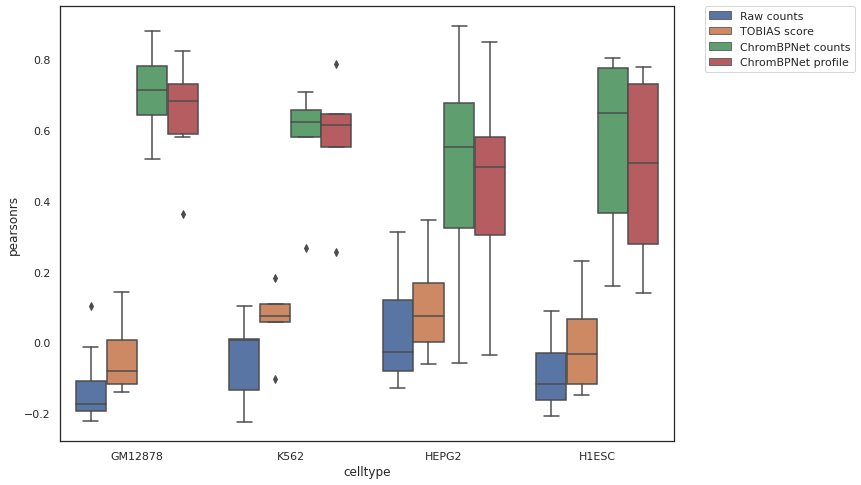

In [145]:
sns.set(rc={'figure.figsize':(11,8)})
sns.set_theme(style='white')
sns.boxplot(data=df, x="celltype", y="pearsonrs", hue="method")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig("box_plot_summary.pdf", dpi=300, transparent=True)


In [146]:
#plt.scatter(data[data["label"]]["chip"], data[data["label"]]["tobias"])

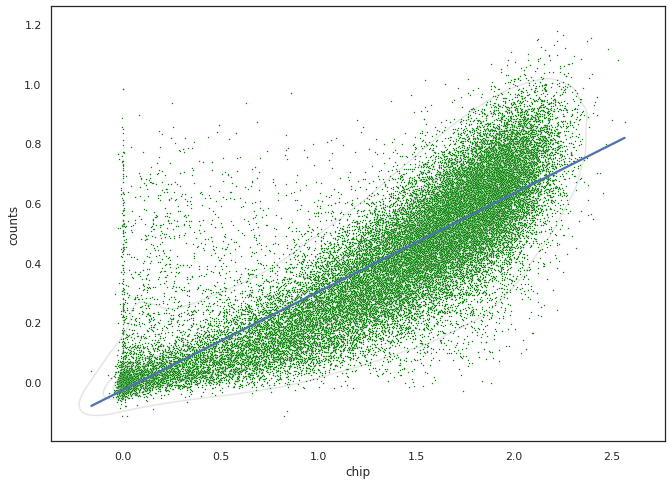

In [134]:
cl="HEPG2"
bed="pattern_0_CTCF.bed"
main_dir="/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_5/chip_seq_compare/output_1/"
data = pd.read_csv(main_dir+cl+"/"+bed, sep='\t', names=names)
data = data[data["label"]]


sns.kdeplot(
    data=data,
    x="chip",
    y="counts",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)

sns.scatterplot(data=data, x="chip", y="counts", s=2, color = "green", rasterized=True)
stats.pearsonr(data["chip"], data["counts"])
sns.regplot(x="chip", y="counts", data=data, scatter=False, ci=None)

plt.savefig("pearsonr_ctcf_counts.pdf", dpi=300, transparent=True)


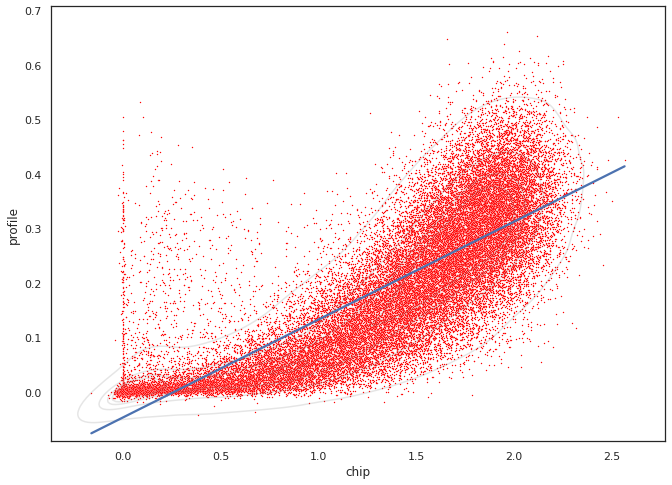

In [135]:
sns.kdeplot(
    data=data,
    x="chip",
    y="profile",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)

sns.scatterplot(data=data, x="chip", y="profile", s=2,  color="red", rasterized=True)
stats.pearsonr(data["chip"], data["profile"])
sns.regplot(x="chip", y="profile", data=data, scatter=False, ci=None)

plt.savefig("pearsonr_ctcf_profile.pdf", dpi=300, transparent=True)


<AxesSubplot:xlabel='chip', ylabel='obs_log'>

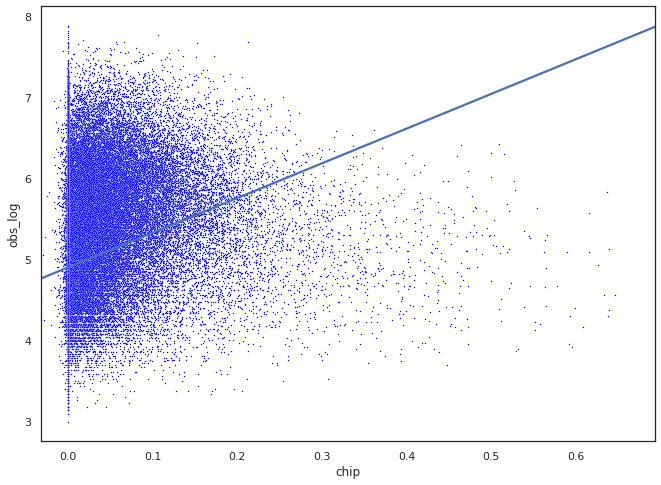

In [148]:
data["obs_log"] = np.log(data["obs"])
# sns.kdeplot(
#     data=data,
#     x="chip",
#     y="obs_log",
#     levels=5,
#     fill=False,
#     alpha=0.2,
#     color="grey",
#     cut=2,

# )

sns.scatterplot(data=data, x="chip", y="obs_log", s=2, color="blue", rasterized=True)
stats.pearsonr(data["chip"], data["obs_log"])
sns.regplot(x="chip", y="obs_log", data=data, scatter=False, ci=None)

#plt.savefig("pearsonr_ctcf_obs.pdf", dpi=300, transparent=True)


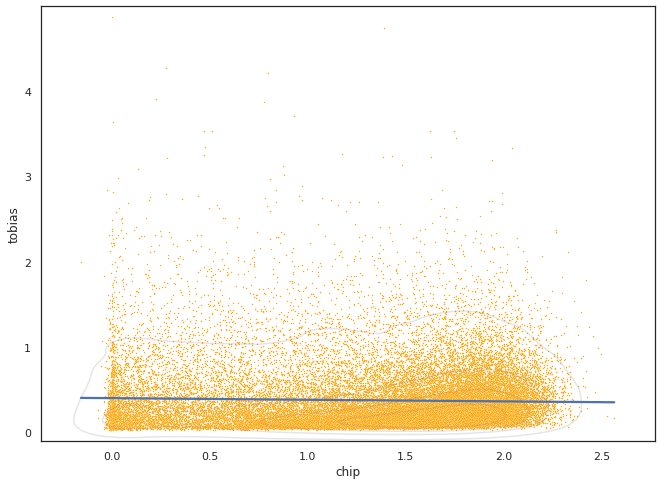

In [137]:
sns.kdeplot(
    data=data,
    x="chip",
    y="tobias",
    levels=5,
    fill=False,
    alpha=0.2,
    color="grey",
    cut=2,

)

sns.scatterplot(data=data, x="chip", y="tobias", s=2,  color="orange", rasterized=True)
stats.pearsonr(data["chip"], data["tobias"])
sns.regplot(x="chip", y="tobias", data=data, scatter=False, ci=None)

plt.savefig("pearsonr_ctcf_tobias.pdf", dpi=300, transparent=True)
